In [1]:
import os, sys, glob
os.environ['R_HOME'] = sys.exec_prefix + '/lib/R/'
import numpy as np
import scanpy as sc
import scFates as scf

In [2]:
fn = glob.glob('../*/*/*/adata_lpm_lineage*.h5ad')[0]
adata = sc.read_h5ad(fn)

In [3]:
adata

AnnData object with n_obs × n_vars = 102324 × 26522
    obs: 'batch', 'percent_mito', 'n_counts', 'n_genes', 'bh_pval', 'region', 'tissue', 'adj_stage', 'adj_sample', 'leiden', 'S_score', 'G2M_score', 'phase', 'predicted_labels', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variableWSSS_THYst8796437', 'highly_variableWSSS_THYst8796442', 'highly_variable5478STDY7935101', 'highly_variable5478STDY7935102', 'highly_variableWSSS_THYst8796439', 'highly_variableWSSS_THYst9384956', 'highly_variable5478STDY7717491', 'highly_variableWSSS_THYst9384953', 'highly_variable5478STDY7717492', 'highly_variableWSSS_THYst9384955', 'highly_variable5386STDY7537944', 'highly_variableWSSS_THYst9384954', 'highly_variableFCAImmP7536759', 'highly_variable5478STDY7980349', 'highly_variableWSSS_THYst8796438', 'highly_variable5478STDY7652318', 'highly_variableWSSS_THYst8796441', 'highly_variableFCAImmP7536758', 'highly_variableWSSS_THYst9384957', 'highly_variable5478STDY7980348', 'highly_vari

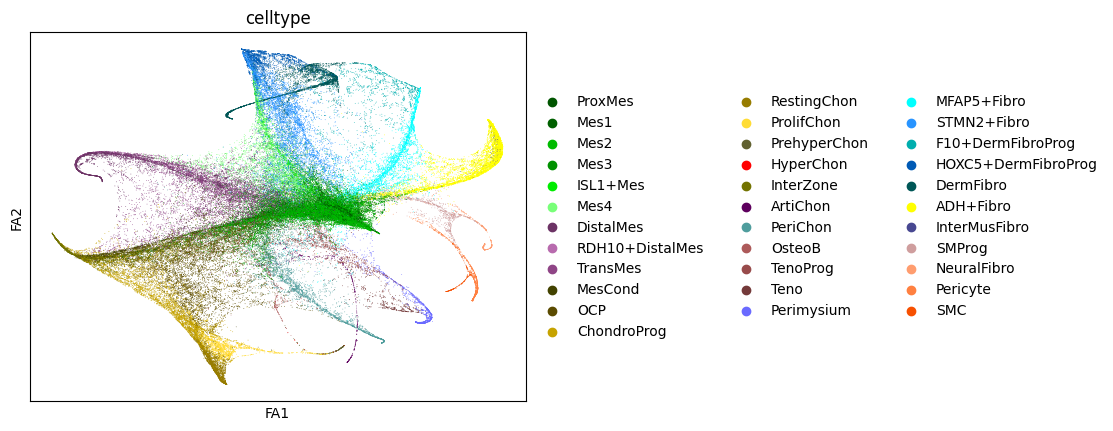

In [4]:
sc.pl.draw_graph(adata, color = 'celltype')

In [5]:
keep = np.array(['Mes1', 'Mes2', 'Mes3'], dtype = str)
adata = adata[adata.obs.celltype.isin(keep)]

In [6]:
adata

View of AnnData object with n_obs × n_vars = 24789 × 26522
    obs: 'batch', 'percent_mito', 'n_counts', 'n_genes', 'bh_pval', 'region', 'tissue', 'adj_stage', 'adj_sample', 'leiden', 'S_score', 'G2M_score', 'phase', 'predicted_labels', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variableWSSS_THYst8796437', 'highly_variableWSSS_THYst8796442', 'highly_variable5478STDY7935101', 'highly_variable5478STDY7935102', 'highly_variableWSSS_THYst8796439', 'highly_variableWSSS_THYst9384956', 'highly_variable5478STDY7717491', 'highly_variableWSSS_THYst9384953', 'highly_variable5478STDY7717492', 'highly_variableWSSS_THYst9384955', 'highly_variable5386STDY7537944', 'highly_variableWSSS_THYst9384954', 'highly_variableFCAImmP7536759', 'highly_variable5478STDY7980349', 'highly_variableWSSS_THYst8796438', 'highly_variable5478STDY7652318', 'highly_variableWSSS_THYst8796441', 'highly_variableFCAImmP7536758', 'highly_variableWSSS_THYst9384957', 'highly_variable5478STDY7980348', 'high

In [7]:
deg = np.array(adata.obsp['connectivities'].sum(axis = 1)).flatten()
adata = adata[deg >= 3]

In [8]:
adata

View of AnnData object with n_obs × n_vars = 21184 × 26522
    obs: 'batch', 'percent_mito', 'n_counts', 'n_genes', 'bh_pval', 'region', 'tissue', 'adj_stage', 'adj_sample', 'leiden', 'S_score', 'G2M_score', 'phase', 'predicted_labels', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variableWSSS_THYst8796437', 'highly_variableWSSS_THYst8796442', 'highly_variable5478STDY7935101', 'highly_variable5478STDY7935102', 'highly_variableWSSS_THYst8796439', 'highly_variableWSSS_THYst9384956', 'highly_variable5478STDY7717491', 'highly_variableWSSS_THYst9384953', 'highly_variable5478STDY7717492', 'highly_variableWSSS_THYst9384955', 'highly_variable5386STDY7537944', 'highly_variableWSSS_THYst9384954', 'highly_variableFCAImmP7536759', 'highly_variable5478STDY7980349', 'highly_variableWSSS_THYst8796438', 'highly_variable5478STDY7652318', 'highly_variableWSSS_THYst8796441', 'highly_variableFCAImmP7536758', 'highly_variableWSSS_THYst9384957', 'highly_variable5478STDY7980348', 'high

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


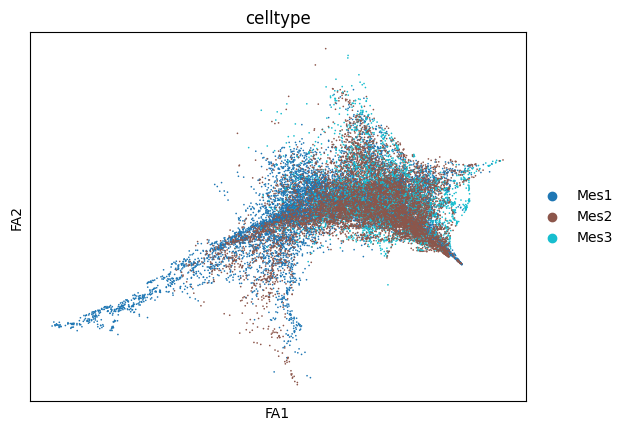

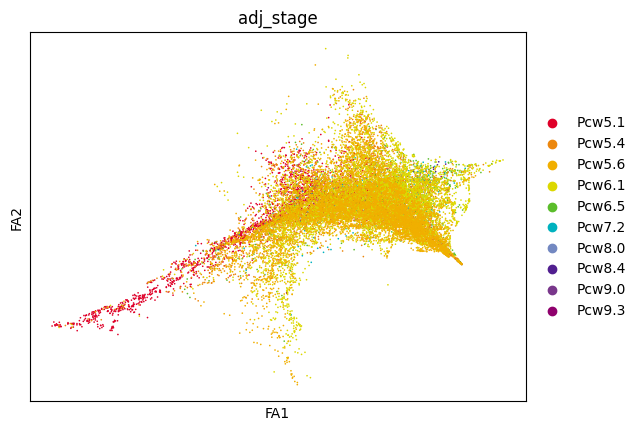

In [9]:
sc.pl.draw_graph(adata, color = 'celltype', palette = 'tab10')
sc.pl.draw_graph(adata, color = 'adj_stage')

In [10]:
sc.tl.draw_graph(adata, layout = 'fa')

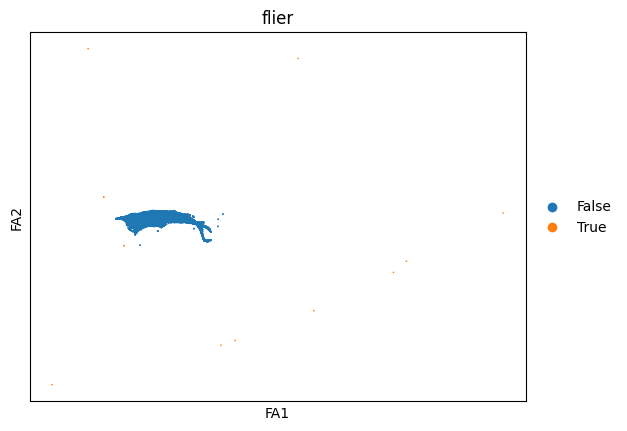

In [27]:
X = adata.obsm['X_draw_graph_fa']
d = np.linalg.norm(X - X.mean(axis = 0), axis = 1)
adata.obs['flier'] = (d > 45000).astype(str)
sc.pl.draw_graph(adata, color = 'flier')

In [28]:
adata = adata[adata.obs.flier == 'False']
adata

View of AnnData object with n_obs × n_vars = 21169 × 26522
    obs: 'batch', 'percent_mito', 'n_counts', 'n_genes', 'bh_pval', 'region', 'tissue', 'adj_stage', 'adj_sample', 'leiden', 'S_score', 'G2M_score', 'phase', 'predicted_labels', 'celltype', 'flier'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variableWSSS_THYst8796437', 'highly_variableWSSS_THYst8796442', 'highly_variable5478STDY7935101', 'highly_variable5478STDY7935102', 'highly_variableWSSS_THYst8796439', 'highly_variableWSSS_THYst9384956', 'highly_variable5478STDY7717491', 'highly_variableWSSS_THYst9384953', 'highly_variable5478STDY7717492', 'highly_variableWSSS_THYst9384955', 'highly_variable5386STDY7537944', 'highly_variableWSSS_THYst9384954', 'highly_variableFCAImmP7536759', 'highly_variable5478STDY7980349', 'highly_variableWSSS_THYst8796438', 'highly_variable5478STDY7652318', 'highly_variableWSSS_THYst8796441', 'highly_variableFCAImmP7536758', 'highly_variableWSSS_THYst9384957', 'highly_variable5478STDY798034

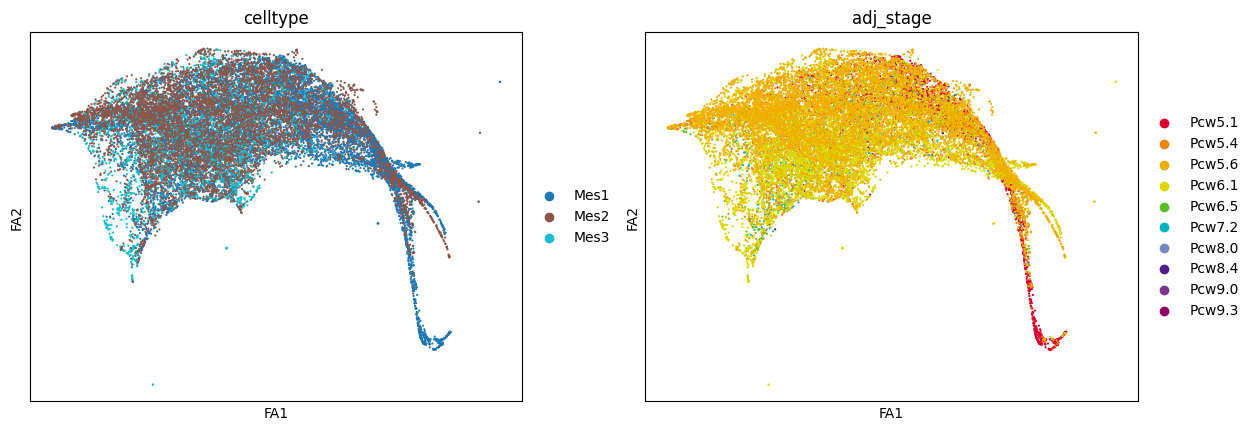

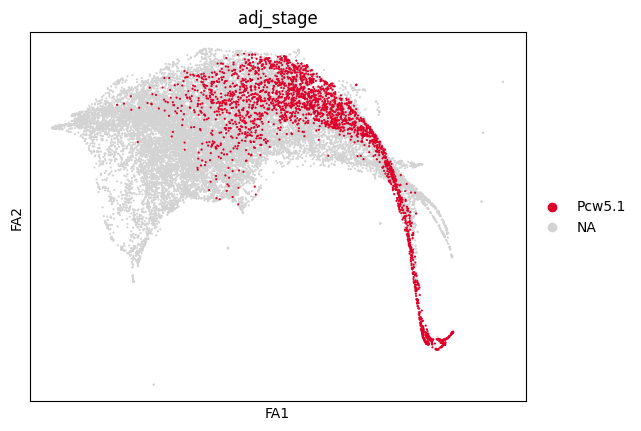

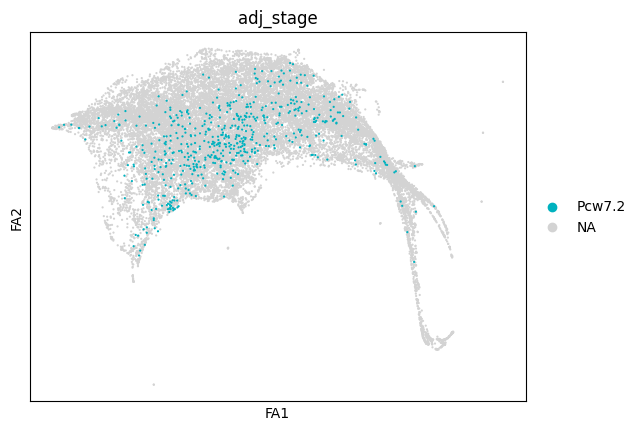

In [30]:
sc.pl.draw_graph(adata, color = ['celltype', 'adj_stage'], size = 10)
sc.pl.draw_graph(adata, color = 'adj_stage', groups = ['Pcw5.1'], size = 10)
sc.pl.draw_graph(adata, color = 'adj_stage', groups = ['Pcw7.2'], size = 10)

In [32]:
adata.obsm['X_draw_graph_fa'] = adata.obsm['X_draw_graph_fa'] / 1000.

inferring a principal curve --> parameters used 
    30 principal points, mu = 10, lambda = 0.01
    finished (0:00:12) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


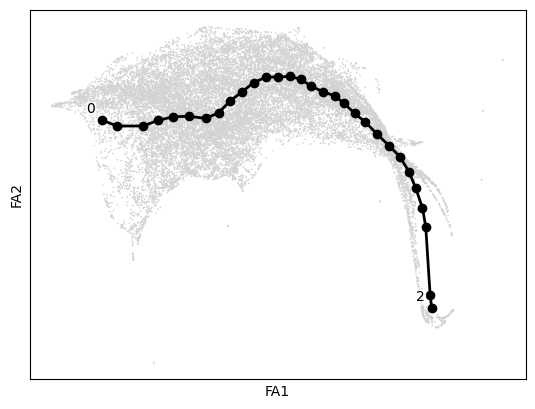

In [55]:
scf.tl.curve(adata, Nodes = 30, epg_lambda = .01, epg_mu = 10, use_rep = 'X_draw_graph_fa', plot = True, basis = 'draw_graph_fa')

In [56]:
scf.tl.root(adata, 2)

node 2 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [57]:
scf.tl.pseudotime(adata)

projecting cells onto the principal graph
    finished (0:00:11) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


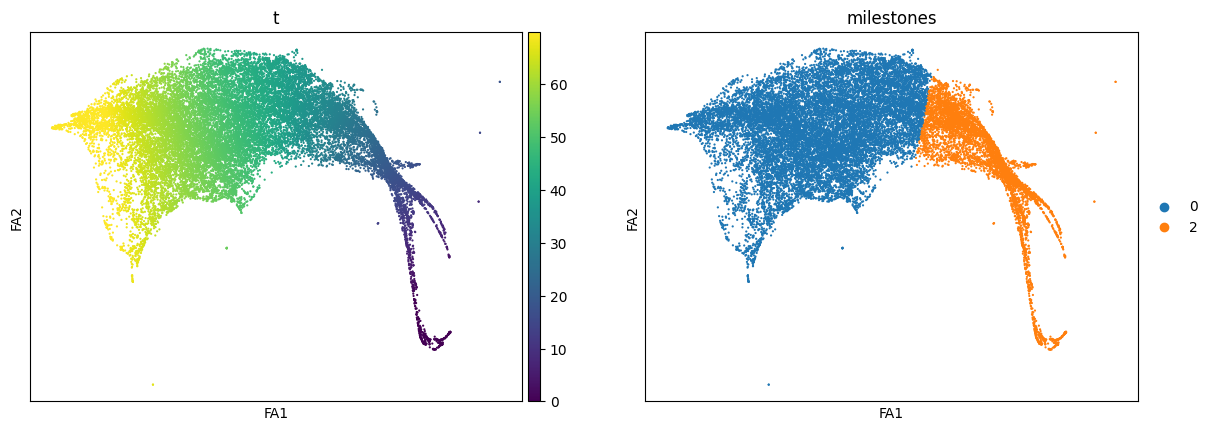

In [59]:
sc.pl.draw_graph(adata, color = ['t', 'milestones'], size = 10)

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


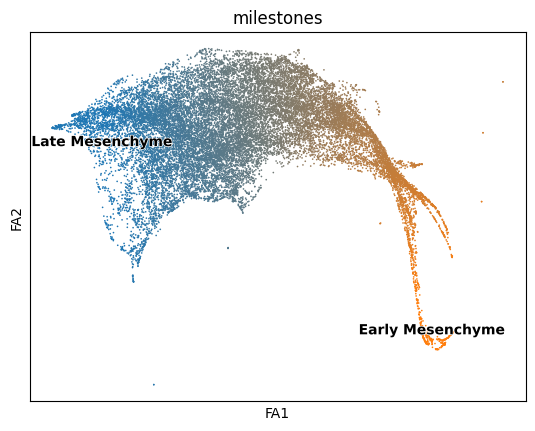

In [60]:
scf.tl.rename_milestones(adata, new = {'2' : 'Early Mesenchyme', '0' : 'Late Mesenchyme'})
scf.pl.milestones(adata, basis = 'draw_graph_fa', annotate = True)

In [61]:
scf.tl.test_association(adata, n_jobs = 8)

test features for association with the trajectory
    single mapping : 100%|██████████| 26522/26522 [1:19:52<00:00,  5.53it/s]
    found 35 significant features (1:20:15) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [67]:
scf.tl.test_association(adata, reapply_filters = True, A_cut = .6)

reapplied filters, 104 significant features


In [68]:
scf.tl.fit(adata, n_jobs = 8)

fit features associated with the trajectory
    single mapping : 100%|██████████| 104/104 [00:30<00:00,  3.44it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:31) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


Clustering features using fitted layer
    finished (0:00:01) --> added 
    .var['clusters'] identified modules.
Cluster 0: 41 Genes
Cluster 1: 40 Genes
Cluster 2: 23 Genes


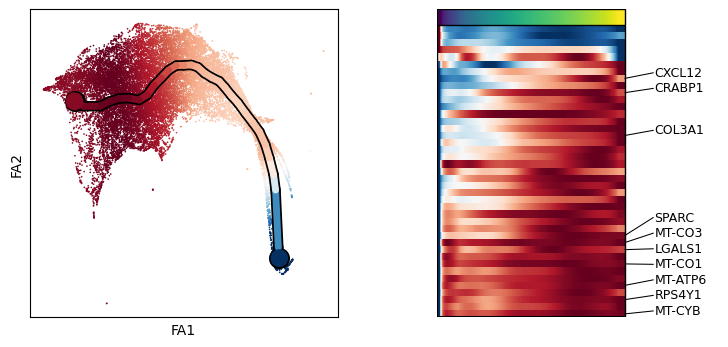

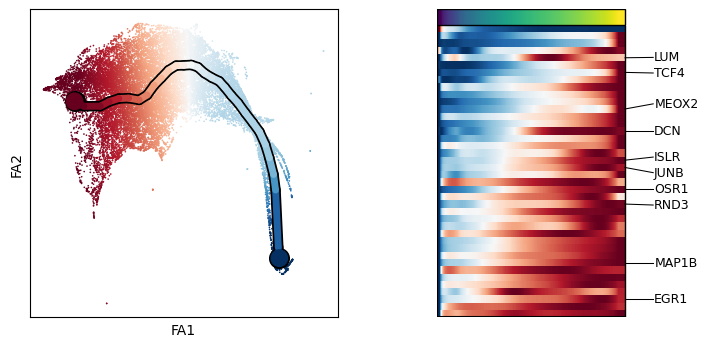

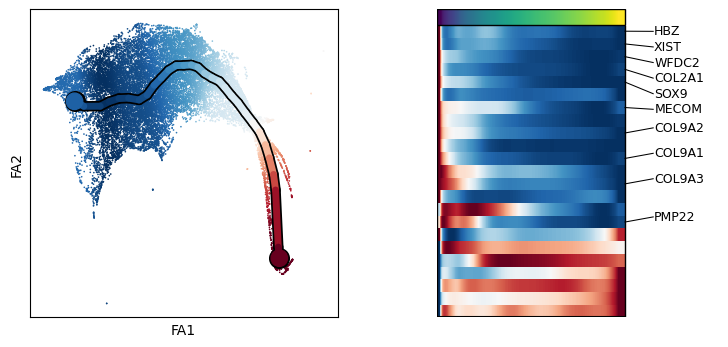

In [77]:
scf.tl.cluster(adata, resolution = .7)
for clus in sorted(adata.var.clusters.unique()):
    clus_msk = (adata.var.clusters == clus)
    clus_features = adata.var_names[clus_msk]
    print(f'Cluster {clus}: {clus_features.size} Genes')
    scf.pl.trends(adata, features = clus_features, basis = 'draw_graph_fa')

late: 81 Genes
early: 23 Genes


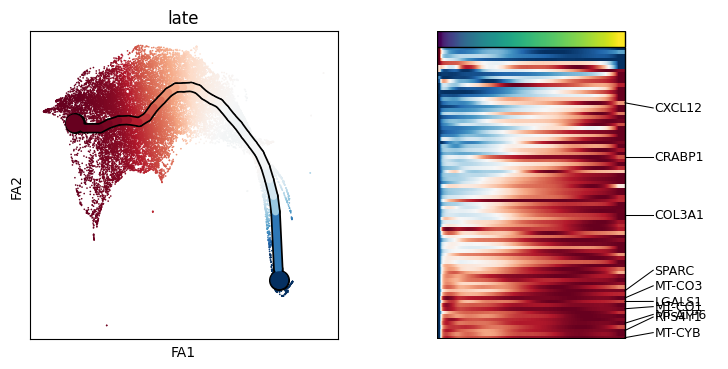

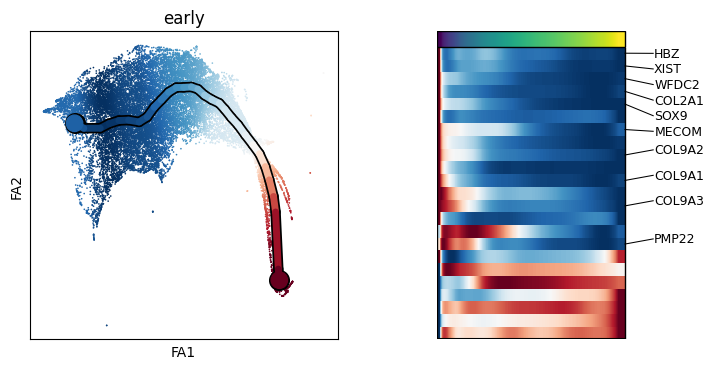

In [78]:
signatures_dict = {
    '0' : 'late',
    '1' : 'late',
    '2' : 'early',
    }
adata.var['signature'] = adata.var.clusters.map(signatures_dict).astype('category')
os.mkdir('results/HCAEmbryonicHindlimb')
for clus in adata.var.signature.unique():
    clus_msk = (adata.var.signature == clus)
    clus_features = adata.var_names[clus_msk]
    print(f'{clus}: {clus_features.size} Genes')
    scf.pl.trends(adata, features = clus_features, basis = 'draw_graph_fa', title = clus)
    np.savetxt(f'results/HCAEmbryonicHindlimb/{clus}.txt', clus_features, fmt = '%s')